# Classification with Keras using Simple Neural Networks

Dataset used - The <strong>MNIST database</strong>, short for Modified National Institute of Standards and Technology database, is a large database of handwritten digits, commonly used for training basic image processing systems.



In [ ]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils import to_categorical

# import Matplotlib in order to view the images handwritten images

import matplotlib.pyplot as plt

In [ ]:
# Import the data
from keras.datasets import mnist

# Read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# The first number in the output tuple is the number of images, 
# the other two numbers are the size of the images in datset (width X height).

X_train.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(60000, 28, 28)

In [ ]:
# To check gpu availability for faster training

import tensorflow as tf

gpu_available = tf.config.list_physical_devices('GPU')
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
device = 'cuda' if tf.test.is_gpu_available() else 'cpu'
device

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


'cuda'

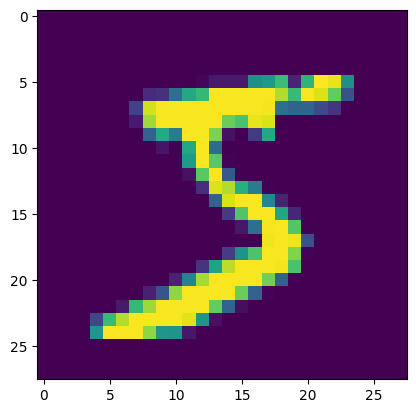

In [5]:
plt.imshow(X_train[0])

In [ ]:
# Flatten images into one-dimensional vector

num_pixels = X_train.shape[1] * X_train.shape[2]                            # find size of one-dimensional vector (width*height)

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')   # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')      # flatten test images

In [ ]:
# Normalize inputs from 0-255 to 0-1
# Since pixel values can range from 0 to 255, let's normalize the vectors to be between 0 and 1.

X_train = X_train / 255
X_test = X_test / 255

# One hot encode output classes
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


In [ ]:
#  Custom callback function to avoid printing metrics for every training epoch (Optional/Can be omitted)

import tensorflow as tf

class PrintCall(tf.keras.callbacks.Callback):
    def __init__(self, interval=10):
        self.interval = interval

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.interval == 0:
            print(f"\nEpoch {epoch + 1}", end=" ")
            for k, v in logs.items():
                print(f"{k}: {v:.4f}", end=" ")

In [ ]:
# Build a Neural Network
# Define classification model
def classification_model():
    # create model

    model = Sequential()
    model.add(Input(shape=(num_pixels,)))
    model.add(Dense(num_pixels, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))


    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Build the model
model = classification_model()

# optional - model.summary() can be printed tp o display the model arch

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, verbose=0, callbacks=[(PrintCall(interval=5))])

# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)



Epoch 5 accuracy: 0.9899 loss: 0.0314 val_accuracy: 0.9797 val_loss: 0.0723 
Epoch 10 accuracy: 0.9947 loss: 0.0164 val_accuracy: 0.9801 val_loss: 0.0940 
Epoch 15 accuracy: 0.9966 loss: 0.0110 val_accuracy: 0.9838 val_loss: 0.1023 
Epoch 20 accuracy: 0.9970 loss: 0.0114 val_accuracy: 0.9847 val_loss: 0.1041 
Epoch 25 accuracy: 0.9977 loss: 0.0084 val_accuracy: 0.9839 val_loss: 0.1149 

In [ ]:
# Save the model for later loading and reusing (for fine-tuning or inference)

model.save('classification_model.keras')

In [ ]:
# Create a NN model with 6 dense layers (more depth) to compare its accuracy with shallow model

def classification_model_6l():
    # create model

    model = Sequential()
    model.add(Input(shape=(num_pixels,)))
    model.add(Dense(num_pixels, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))


    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


model_6 = classification_model_6l()

model_6.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=0, callbacks=[(PrintCall(interval=5))])

scores_6 = model_6.evaluate(X_test, y_test, verbose=0)


# Print the accuracy for both models

print('Accuracy_3_layers: {}% \n Accuracy_6_layers: {}'.format(scores[1], scores_6[1]))


Epoch 5 accuracy: 0.9849 loss: 0.0552 val_accuracy: 0.9798 val_loss: 0.0796 
Epoch 10 accuracy: 0.9926 loss: 0.0270 val_accuracy: 0.9818 val_loss: 0.0867 Accuracy_3_layers: 0.9839000105857849% 
 Accuracy_6_layers: 0.9818000197410583


In [ ]:
# Load the earlier saved model for fine-tuning further to check for improvements

pretrained_model = keras.saving.load_model('classification_model.keras')

pretrained_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

scores_20_epochs = pretrained_model.evaluate(X_test, y_test, verbose=0)
print('Accuracy_10_epochs: {}% \n Accuracy_20_epochs: {}'.format(scores[1], scores_20_epochs[1]))

Epoch 1/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9981 - loss: 0.0074 - val_accuracy: 0.9813 - val_loss: 0.1397
Epoch 2/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9981 - loss: 0.0071 - val_accuracy: 0.9830 - val_loss: 0.1321
Epoch 3/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9973 - loss: 0.0103 - val_accuracy: 0.9800 - val_loss: 0.1682
Epoch 4/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9977 - loss: 0.0096 - val_accuracy: 0.9805 - val_loss: 0.1489
Epoch 5/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9985 - loss: 0.0052 - val_accuracy: 0.9820 - val_loss: 0.1465
Epoch 6/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9979 - loss: 0.0089 - val_accuracy: 0.9813 - val_loss: 0.1623
Epoch 7/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9976 - loss: 0.0092 - val_accuracy: 0.9828 - val_loss: 0.1538
Epoch 8/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9983 - loss: 0.0077 - val_accuracy: 0.9826 - val_loss: 0.1707
Epoch 9/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9983 - loss: 0.0064 - val_accuracy: 0.9841 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


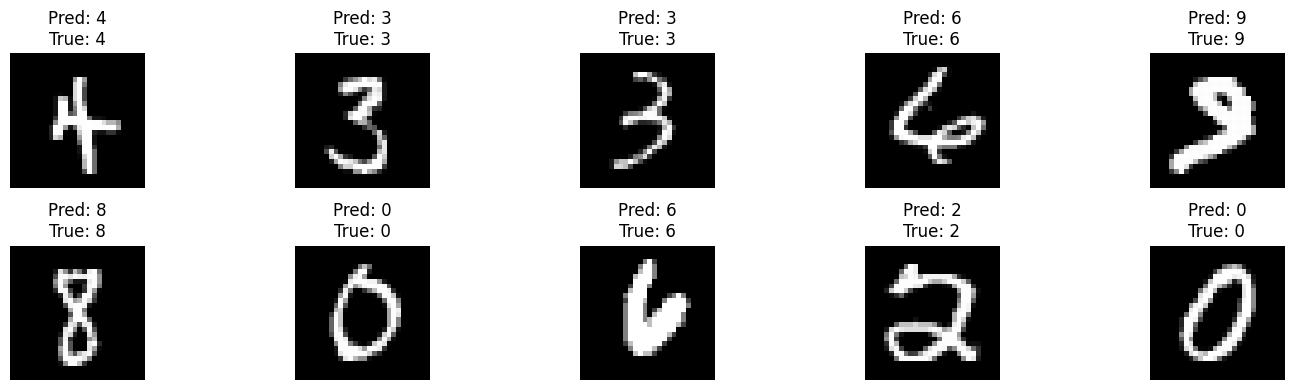

In [ ]:
# X_test.shape
# Test for 10 random images to compare predicted and actual results
import numpy as np

indices = np.random.choice(len(X_test), size=10, replace=False)     # Randomly choose 10 images from the test dataset
probs = model.predict(X_test[indices])                              # Predict the probabilities of class of that handwritten digit
y_pred = np.argmax(probs, axis=1)                                   # Select the highest prob index

plt.figure(figsize=(15, 4))

for i, idx in enumerate(indices):
    image = X_test[idx].reshape(28, 28)                             # reshape the flattened 1-D data into 2-D image
    true_label = y_test[idx].argmax()
    pred_label = y_pred[i]

    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap="gray")
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
    plt.axis("off")

plt.tight_layout()
plt.show()

#### Notes

- Executing 25 epochs on a cpu-only system might take longer (Reduce no. of epochs for faster training)
- Changing no. of epochs changes accuracy and are not proportional or correlated